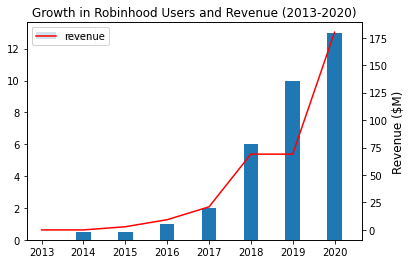

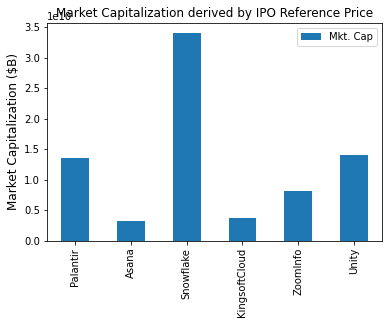

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

width = .35 # width of a bar

m1_t = pd.DataFrame({
 'revenue' : [0,0,2.9,9.3,21,69,69,180],
 'users' : [0,0.5,0.5,1,2,6,10,13]})

m1_t[['users']].plot(kind='bar', width = width)
m1_t['revenue'].plot(color='red',secondary_y=True)

ax = plt.gca()
ax.legend()
plt.xlim([-width, len(m1_t['users'])-width])

ax.set_xticklabels(('2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'))
plt.title('Growth in Robinhood Users and Revenue (2013-2020)')
plt.xlabel('Year', fontsize=32)
plt.ylabel('Revenue ($M)', fontsize=12)

plt.show()


width = .5 # width of a bar
m1_t = pd.DataFrame({
 'Mkt. Cap' : [13615104822,3246679245,33972040237,3706302521,8175471698,14080376308]})

m1_t[['Mkt. Cap']].plot(kind='bar', width = width)

ax = plt.gca()
ax.legend()
plt.xlim([-width, len(m1_t['Mkt. Cap'])-width])

ax.set_xticklabels(('Palantir', 'Asana', 'Snowflake', 'KingsoftCloud', 'ZoomInfo', 'Unity'))
plt.title('Market Capitalization derived by IPO Reference Price')
#plt.xlabel('Company', fontsize=12)
plt.ylabel('Market Capitalization ($B)', fontsize=12)

plt.show()




# Weighing Method 0 Graphs

In [48]:
from os import path
import csv
import plotly.express as px
import numpy as np

REPO_PATH = "/Users/michellelee/Documents/GitHub/cs591_sns_ipo/sentiment_data/" # change me

# neg,neu,pos,compound,vader,txtblob,retweets,favorites,
# weighted_compound_0,score_0,weighted_compound_1,score_1,
# weighted_compound_2,score_2,weighted_compound_3,score_3

df = pd.read_csv(REPO_PATH+'PLTR_Tweets.csv') 



"""
score = []
# use this if we need to calculate compound (?)
for i in range(len(df['weighted_compound_0'])):
    score.append(df['weighted_compound_0'][i]*df['score_0'][i])
    bubble.append(df['retweets'][i]+df['favorites'][i])
df['score'] = score
"""

bubble = []
for i in range(len(df['weighted_compound_0'])):
    bubble.append(df['retweets'][i]+df['favorites'][i])
df['bubble'] = bubble

# print(df)
fig = px.scatter(df, x="Unnamed: 0", y="weighted_compound_0", trendline="lowess", size="bubble",range_y=[-1,1], 
                 title="Palantir Tweets Sentiment Analysis",
                 labels={ # replaces default labels by column name
                "Unnamed: 0": "x axis",  "compound": "Weighted sentiment value ()"})
fig.show()